In [1]:
!curl -o diabetic.csv https://raw.githubusercontent.com/chandralegend/uom-2025-ai-sessions/refs/heads/main/session-2/machine-learning-0/diabetes.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  5 23873    5  1378    0     0   2444      0  0:00:09 --:--:--  0:00:09  2487
100 23873  100 23873    0     0  40865      0 --:--:-- --:--:-- --:--:-- 41590


#### Class Assignment
1. Use the given diabetics dataset and do the following
2. Do data cleaning, visualize, and remove outliers
3. Create a correlation matrix (use seaborn heatmap), create pie diagrams for output variable
4. Do feature scaling and save the processed data as csv files

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("diabetic.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum() / df.shape[0] * 100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [7]:
df_processed = df.copy()

In [8]:
mean_age = df_processed['Age'].mean()
std_age = df_processed['Age'].std()

lower_bound = mean_age - 2 * std_age
upper_bound = mean_age + 2 * std_age

outliers = df_processed[(df_processed['Age'] < lower_bound) | (df_processed['Age'] > upper_bound)]

In [9]:
outliers.shape

(47, 9)

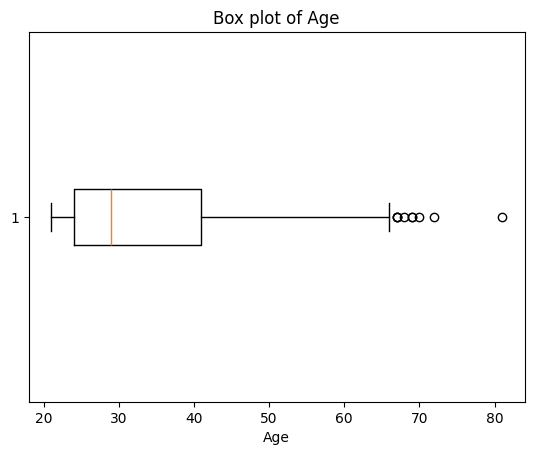

In [10]:
# Detect Outliers

import matplotlib.pyplot as plt

plt.boxplot(df_processed['Age'], vert=False)
plt.title('Box plot of Age')
plt.xlabel('Age')
plt.show()

In [11]:
df_processed = df_processed[(df_processed['Age'] > lower_bound) | (df_processed['Age'] < upper_bound)]

In [13]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
Y = df_processed[["Outcome"]]
X = df_processed[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]

In [16]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [20]:
import seaborn as sns

In [24]:
correlation_matrix = df_processed.corr()

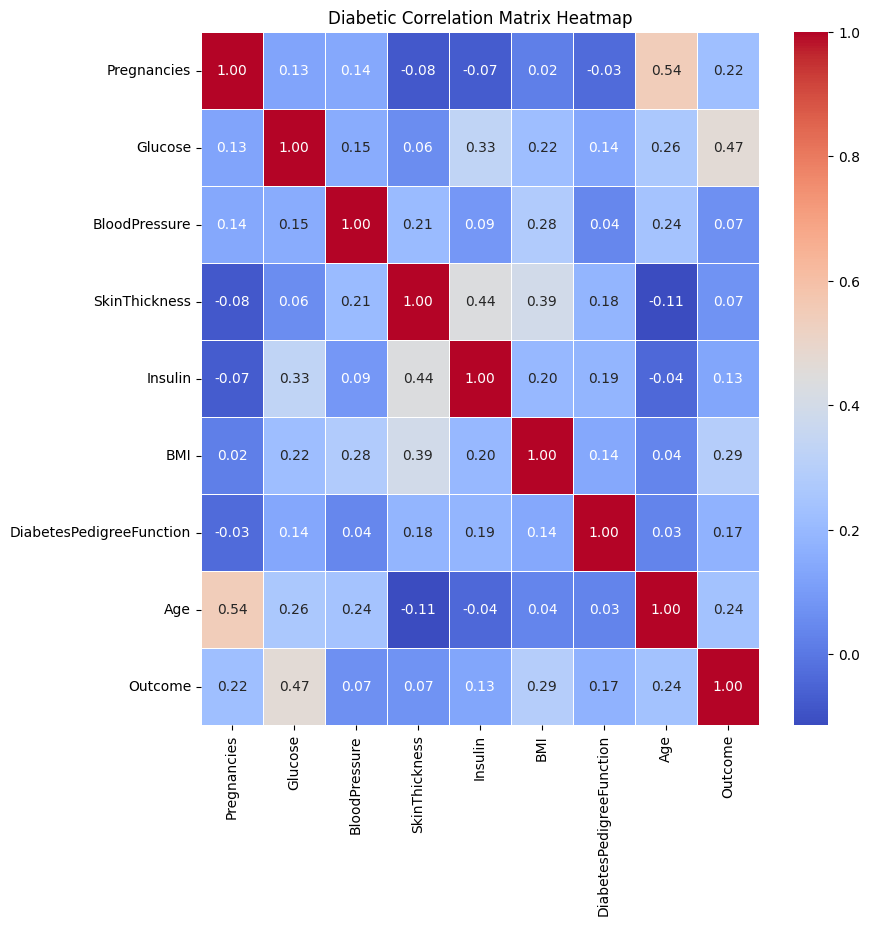

In [28]:
plt.figure(figsize=(9, 9)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Diabetic Correlation Matrix Heatmap')
plt.show()

In [37]:
Y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [46]:
import numpy as np

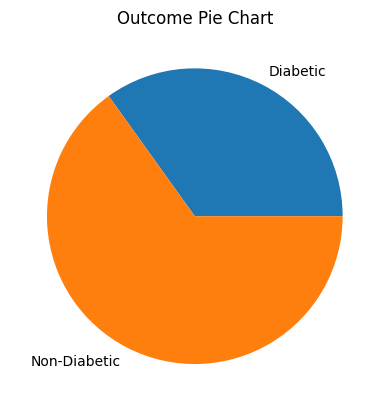

In [48]:
diabeticcount = sum(np.where(Y["Outcome"]==1, 1, 0))
nondiabetic = Y["Outcome"].size - diabeticcount

plt.pie([diabeticcount, nondiabetic], labels = ["Diabetic", "Non-Diabetic"])
plt.title('Outcome Pie Chart')
plt.show()

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_cols = [col for col in X.columns if X[col].dtype != 'object']
X[num_cols] = scaler.fit_transform(X[num_cols])
X.head()

C:\Users\Kodithuwakku\AppData\Local\Temp\ipykernel_12172\2157289910.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_cols] = scaler.fit_transform(X[num_cols])


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [45]:
import csv

with open("diabeticX.csv", "w", newline="") as datafile:
    writer = csv.writer(datafile)
    writer.writerow(X)
    writer.writerows(X.to_numpy())
with open("diabeticY.csv", "w", newline="") as datafile:
    write = csv.writer(datafile)
    write.writerow(Y)
    write.writerows(Y.to_numpy())

